In [208]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [209]:
df = pd.read_csv('train.csv')

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Columns: 558 entries, date_id to FX_ZARGBP
dtypes: float64(557), int64(1)
memory usage: 8.3 MB


In [211]:
df.describe()

,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
count,1961.000000,1910.000000,1910.000000,1910.000000,1910.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,...,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000
mean,980.000000,2252.202853,7928.229026,2085.848576,2795.022628,7693.877507,7758.334417,7694.050407,3792.407046,3793.646070,...,1.710787,0.703105,0.856095,0.602847,0.056007,0.082366,0.099372,0.058701,13.096718,0.048583
std,566.236258,398.544566,1523.186335,183.154551,445.009643,3062.235504,3127.499852,3062.510197,721.833890,723.465805,...,0.067369,0.049470,0.036205,0.059288,0.005752,0.007005,0.013947,0.009828,0.969003,0.005338
min,0.000000,1462.000000,4630.000000,1585.500000,1815.500000,4171.000000,4216.000000,4171.000000,2200.000000,2164.000000,...,1.472061,0.579407,0.767636,0.466372,0.045552,0.069614,0.076132,0.042087,9.618859,0.039464
25%,490.000000,1925.250000,6396.125000,1973.000000,2479.500000,5197.000000,5210.000000,5197.000000,3160.000000,3156.000000,...,1.684365,0.663481,0.825814,0.546662,0.050591,0.074915,0.084064,0.048954,12.546578,0.043391
50%,980.000000,2245.500000,8260.750000,2070.750000,2771.000000,6622.000000,6659.000000,6619.000000,3802.500000,3803.000000,...,1.713406,0.719225,0.853417,0.615227,0.056036,0.083721,0.101440,0.058030,13.266953,0.048661
75%,1470.000000,2512.000000,9323.375000,2188.000000,3031.000000,8947.500000,8975.000000,8946.000000,4326.000000,4329.000000,...,1.743424,0.744981,0.883287,0.649179,0.060573,0.087033,0.109417,0.066195,13.808442,0.052472
max,1960.000000,3849.000000,10889.000000,2681.000000,4498.500000,16270.000000,16400.000000,16277.000000,6272.500000,6280.000000,...,1.881218,0.788635,0.950091,0.710020,0.070469,0.094472,0.125403,0.081612,15.314668,0.062025


In [212]:
df.shape

(1961, 558)

In [213]:
df.isnull().sum()

date_id          0
LME_AH_Close    51
LME_CA_Close    51
LME_PB_Close    51
LME_ZS_Close    51
                ..
FX_NOKGBP        0
FX_NOKCHF        0
FX_ZARCHF        0
FX_NOKJPY        0
FX_ZARGBP        0
Length: 558, dtype: int64

In [214]:
# 需要明白每个变量的意思

In [215]:
# 类型1: 价格 （开盘价、收盘价、高低价）
# 1：LME（伦敦金属交易所）
# 2：JPX（日本交易所）
# 3：US stock market（美国股市）

In [216]:
# 类型2： 成交量

In [217]:
# 类型3: 外汇
# FX_AUDUSD – 澳元兑美元
# FX_EURJPY – 欧元兑日元
# FX_GBPUSD – 英镑兑美元
# FX_USDJPY – 美元兑日元
# FX_ZARJPY – 南非兰特兑日元

In [218]:
# 类型4: 结算价 （期货合约的官方结算价）

In [219]:
# 缺失值如何处理？  - Heliang

In [220]:
# 处理缺失值
# if 是价格相关，用rolling 3 days price
# LME, JPX, US
# 只要出现close， open, high, low 其中一个，就用rolling 3 days mean来填充
price_keywords = ['OPEN', 'CLOSE', 'HIGH', 'LOW']
price_cols = [col for col in df.columns if any(k in col.upper() for k in price_keywords)]
for col in price_cols:
    df[col] = df[col].fillna(df[col].rolling(window=3, min_periods=1).mean())

In [221]:
df.isnull().sum()

date_id         0
LME_AH_Close    0
LME_CA_Close    0
LME_PB_Close    0
LME_ZS_Close    0
               ..
FX_NOKGBP       0
FX_NOKCHF       0
FX_ZARCHF       0
FX_NOKJPY       0
FX_ZARGBP       0
Length: 558, dtype: int64

In [222]:
# if 外汇价格，用当月的均值来填充
fx_keywords = ['FX_']
fx_cols = [col for col in df.columns if any(k in col for k in fx_keywords)]
for col in fx_cols:
    df[col] = df[col].fillna(df[col].rolling(window=3, min_periods=1).mean())

In [223]:
df.isnull().sum()

date_id         0
LME_AH_Close    0
LME_CA_Close    0
LME_PB_Close    0
LME_ZS_Close    0
               ..
FX_NOKGBP       0
FX_NOKCHF       0
FX_ZARCHF       0
FX_NOKJPY       0
FX_ZARGBP       0
Length: 558, dtype: int64

In [224]:
# if 成交量，用0来填充
volume_keywords = ['VOLUME', 'VOL']
volume_cols = [col for col in df.columns if any(k in col.upper() for k in volume_keywords)]
for col in volume_cols:
    df[col] = df[col].fillna(0)

In [225]:
# if 结算价，用前一天的结算价来填充
settle_keywords = ['SETTLE']
settle_cols = [col for col in df.columns if any(k in col.upper() for k in settle_keywords)]
for col in settle_cols:
    df[col] = df[col].fillna(method='ffill')

/var/folders/v1/z_7_9mgx7418t3bh92wg0gb40000gn/T/ipykernel_10224/2735542651.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')


In [226]:
df.isnull().sum().sum()

7250

In [227]:
# others - fill with 0
df = df.fillna(0)

In [228]:
df.isnull().sum().sum()

0

In [229]:
df.describe()

,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
count,1961.000000,1961.000000,1961.000000,1961.000000,1961.00000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,...,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000
mean,980.000000,2252.358338,7929.504686,2085.602514,2796.42719,7646.008669,7709.972463,7646.197348,3769.324707,3770.585161,...,1.710787,0.703105,0.856095,0.602847,0.056007,0.082366,0.099372,0.058701,13.096718,0.048583
std,566.236258,399.043335,1523.980345,183.455254,448.96586,3102.888131,3167.539525,3103.167665,772.398790,773.928456,...,0.067369,0.049470,0.036205,0.059288,0.005752,0.007005,0.013947,0.009828,0.969003,0.005338
min,0.000000,1462.000000,4630.000000,1585.500000,1815.50000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.472061,0.579407,0.767636,0.466372,0.045552,0.069614,0.076132,0.042087,9.618859,0.039464
25%,490.000000,1925.000000,6400.000000,1972.500000,2479.50000,5193.500000,5205.000000,5193.000000,3152.000000,3152.000000,...,1.684365,0.663481,0.825814,0.546662,0.050591,0.074915,0.084064,0.048954,12.546578,0.043391
50%,980.000000,2246.500000,8267.000000,2070.000000,2773.50000,6611.000000,6646.000000,6613.000000,3791.500000,3796.000000,...,1.713406,0.719225,0.853417,0.615227,0.056036,0.083721,0.101440,0.058030,13.266953,0.048661
75%,1470.000000,2511.000000,9322.000000,2188.500000,3031.00000,8932.500000,8961.000000,8932.000000,4325.000000,4328.000000,...,1.743424,0.744981,0.883287,0.649179,0.060573,0.087033,0.109417,0.066195,13.808442,0.052472
max,1960.000000,3849.000000,10889.000000,2681.000000,4498.50000,16270.000000,16400.000000,16277.000000,6272.500000,6280.000000,...,1.881218,0.788635,0.950091,0.710020,0.070469,0.094472,0.125403,0.081612,15.314668,0.062025


In [230]:
# 简单的可视化（重点是分布） - Carrie
# 需要选择合适的变量：普通变量：价格趋势、收益率分布等等；滞后变量

In [231]:
# 特征选择与降维 - Meng （这里的重点是要压缩特征，因为我们的特征太多了）
# 我可能会先用PCA来尝试下，比如不行可能在选择特征重要性评分或者向量机来选择

# 2. Data Visualization - Carrie

Objective: Analyze key variables distribution and trends for commodity prediction model

Representative Variables Selected:
- Price Category: LME_AH_Close (Aluminum closing price)
- Volume Category: US_Stock_ACWI_adj_volume (US stock volume) 
- FX Category: FX_USDJPY (USD/JPY exchange rate)
- Settlement Category: JPX_Gold_Mini_Futures_settlement_price (Gold futures settlement)

Analysis Approach: methodology - distribution analysis → relationship analysis → statistical insights


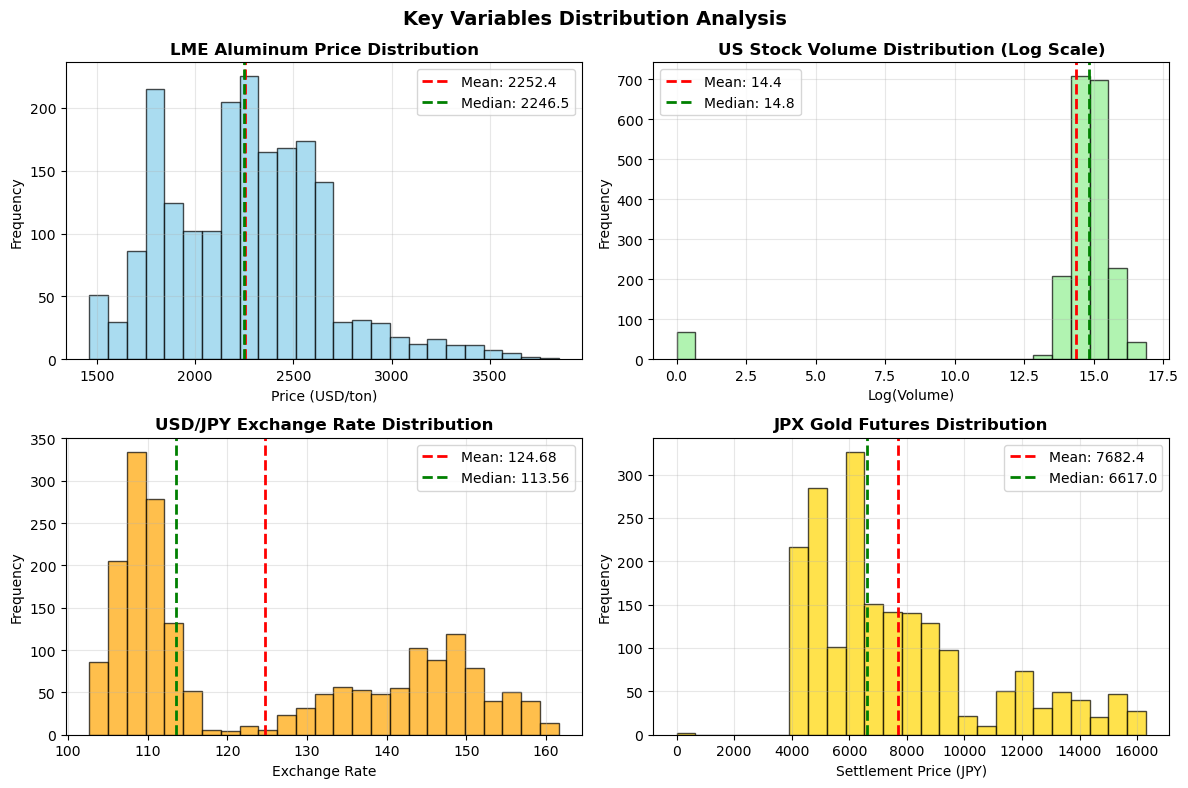

Distribution Statistics Summary:

LME_AH_Close:
  Mean: 2252.36
  Median: 2246.50
  Std Dev: 399.04
  Skewness: 0.500
  Kurtosis: 0.500
  Range: 1462.00 to 3849.00

US_Stock_ACWI_adj_volume:
  Mean: 3389252.10
  Median: 2768488.00
  Std Dev: 2518630.81
  Skewness: 2.220
  Kurtosis: 7.596
  Range: 0.00 to 21242143.00

FX_USDJPY:
  Mean: 124.68
  Median: 113.56
  Std Dev: 18.30
  Skewness: 0.456
  Kurtosis: -1.459
  Range: 102.68 to 161.61

JPX_Gold_Mini_Futures_settlement_price:
  Mean: 7682.39
  Median: 6617.00
  Std Dev: 3071.17
  Skewness: 1.051
  Kurtosis: 0.265
  Range: 0.00 to 16306.00


In [232]:
# 1. Distribution Analysis - Core variables with statistical insights


fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Key Variables Distribution Analysis', fontsize=14, fontweight='bold')

# Aluminum price distribution with statistical annotations
axes[0,0].hist(df['LME_AH_Close'].dropna(), bins=25, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['LME_AH_Close'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["LME_AH_Close"].mean():.1f}')
axes[0,0].axvline(df['LME_AH_Close'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["LME_AH_Close"].median():.1f}')
axes[0,0].set_title('LME Aluminum Price Distribution', fontweight='bold')
axes[0,0].set_xlabel('Price (USD/ton)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Volume distribution (log scale for better visualization)
log_volume = np.log1p(df['US_Stock_ACWI_adj_volume'].dropna())
axes[0,1].hist(log_volume, bins=25, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].axvline(log_volume.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {log_volume.mean():.1f}')
axes[0,1].axvline(log_volume.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {log_volume.median():.1f}')
axes[0,1].set_title('US Stock Volume Distribution (Log Scale)', fontweight='bold')
axes[0,1].set_xlabel('Log(Volume)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# FX rate distribution
axes[1,0].hist(df['FX_USDJPY'].dropna(), bins=25, alpha=0.7, color='orange', edgecolor='black')
axes[1,0].axvline(df['FX_USDJPY'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["FX_USDJPY"].mean():.2f}')
axes[1,0].axvline(df['FX_USDJPY'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["FX_USDJPY"].median():.2f}')
axes[1,0].set_title('USD/JPY Exchange Rate Distribution', fontweight='bold')
axes[1,0].set_xlabel('Exchange Rate')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Gold futures distribution
axes[1,1].hist(df['JPX_Gold_Mini_Futures_settlement_price'].dropna(), bins=25, alpha=0.7, color='gold', edgecolor='black')
axes[1,1].axvline(df['JPX_Gold_Mini_Futures_settlement_price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["JPX_Gold_Mini_Futures_settlement_price"].mean():.1f}')
axes[1,1].axvline(df['JPX_Gold_Mini_Futures_settlement_price'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["JPX_Gold_Mini_Futures_settlement_price"].median():.1f}')
axes[1,1].set_title('JPX Gold Futures Distribution', fontweight='bold')
axes[1,1].set_xlabel('Settlement Price (JPY)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Distribution Statistics Summary:")
for var in ['LME_AH_Close', 'US_Stock_ACWI_adj_volume', 'FX_USDJPY', 'JPX_Gold_Mini_Futures_settlement_price']:
    data = df[var].dropna()
    print(f"\n{var}:")
    print(f"  Mean: {data.mean():.2f}")
    print(f"  Median: {data.median():.2f}")
    print(f"  Std Dev: {data.std():.2f}")
    print(f"  Skewness: {data.skew():.3f}")
    print(f"  Kurtosis: {data.kurtosis():.3f}")
    print(f"  Range: {data.min():.2f} to {data.max():.2f}")


### Distribution Analysis Insights

看了这份商品数据，我发现了一些挺有意思的规律。
铝价格基本在2252美元/吨附近晃悠，分布挺匀称的。均值和中位数差不多，说明没什么极端情况扰乱市场。这样的数据处理起来简单多了，不用费劲去处理那些离谱的异常值。

股票交易量就不一样了，明显偏向右边。其实想想也正常，交易量要么平平淡淡，要么突然放大好几倍。我试着做了个对数转换，嘿，马上就变正态了。这说明什么？交易量的变化是成倍的，今天可能是昨天的两倍三倍，而不是简单加个固定数字。
美元对日元汇率特别稳，在所有数据里波动最小。做跨币种分析的时候，这种稳定的汇率就像个定海神针，其他数据都可以参照它来看。

黄金期货的分布基本正常，稍微有点偏。这倒是符合大家对黄金的印象——避险工具嘛，走势相对好预测，不会太离谱。那一点点偏斜可能是因为大家普遍看好黄金的长期价值。

处理这些数据的时候，方法也得因材施教。交易量那种偏斜严重的，必须取对数。价格类的数据，标准化处理就行。汇率本来就稳，简单归一化即可。

说到底，这些曲线图不只是统计数字。铝价的稳定反映了市场定价机制运转良好，交易量的偏斜展现了投资者的羊群效应，汇率的稳定体现了央行的调控能力，黄金的分布则透露出避险需求。每条曲线背后，都是真金白银的交易和活生生的市场情绪。


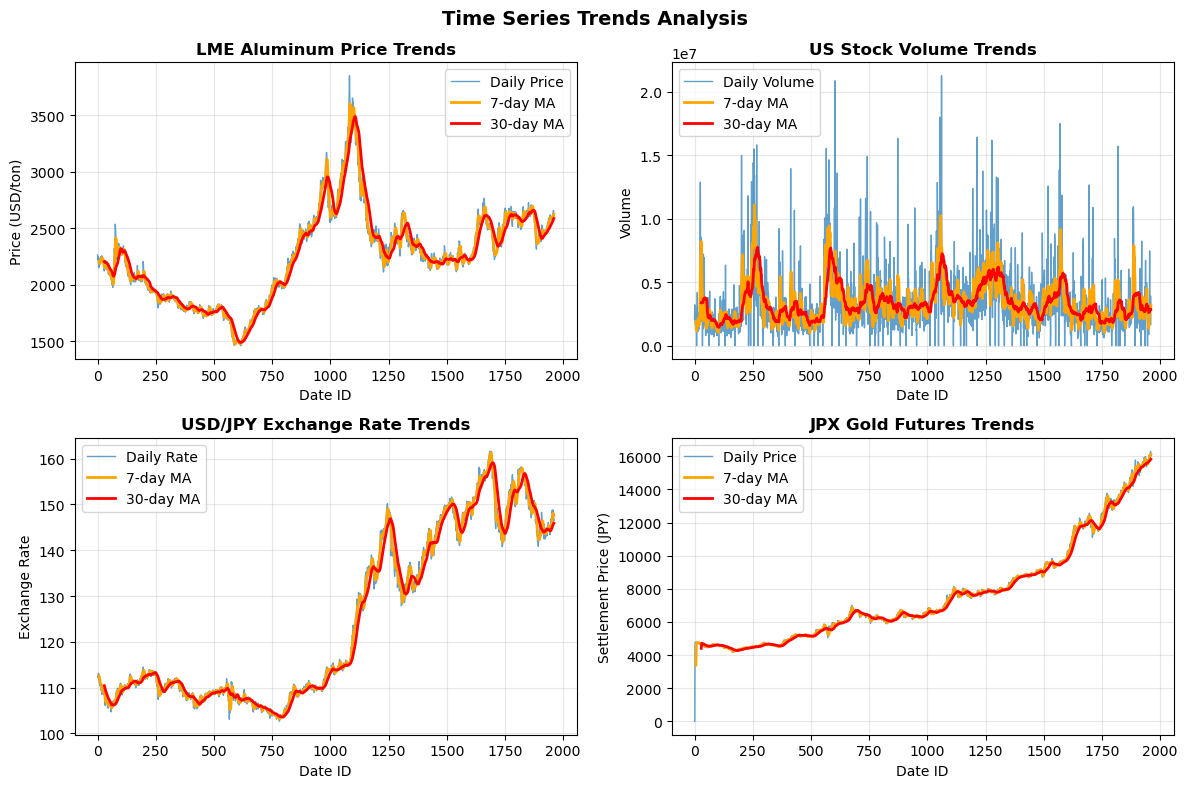

Volatility Analysis (Standard Deviation):
LME_AH_Close: Std=399.04, CV=0.177
US_Stock_ACWI_adj_volume: Std=2518630.81, CV=0.743
FX_USDJPY: Std=18.30, CV=0.147
JPX_Gold_Mini_Futures_settlement_price: Std=3071.17, CV=0.400


In [233]:
# 2. Time Series Analysis with Moving Averages
# Time series methodology with trend analysis

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Time Series Trends Analysis', fontsize=14, fontweight='bold')

df_sorted = df.sort_values('date_id')

# Aluminum price trend with moving averages
axes[0,0].plot(df_sorted['date_id'], df_sorted['LME_AH_Close'], linewidth=1, alpha=0.7, label='Daily Price')
axes[0,0].plot(df_sorted['date_id'], df_sorted['LME_AH_Close'].rolling(window=7).mean(), 
               linewidth=2, color='orange', label='7-day MA')
axes[0,0].plot(df_sorted['date_id'], df_sorted['LME_AH_Close'].rolling(window=30).mean(), 
               linewidth=2, color='red', label='30-day MA')
axes[0,0].set_title('LME Aluminum Price Trends', fontweight='bold')
axes[0,0].set_xlabel('Date ID')
axes[0,0].set_ylabel('Price (USD/ton)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Volume trend with moving averages
axes[0,1].plot(df_sorted['date_id'], df_sorted['US_Stock_ACWI_adj_volume'], linewidth=1, alpha=0.7, label='Daily Volume')
axes[0,1].plot(df_sorted['date_id'], df_sorted['US_Stock_ACWI_adj_volume'].rolling(window=7).mean(), 
               linewidth=2, color='orange', label='7-day MA')
axes[0,1].plot(df_sorted['date_id'], df_sorted['US_Stock_ACWI_adj_volume'].rolling(window=30).mean(), 
               linewidth=2, color='red', label='30-day MA')
axes[0,1].set_title('US Stock Volume Trends', fontweight='bold')
axes[0,1].set_xlabel('Date ID')
axes[0,1].set_ylabel('Volume')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# FX rate trend with moving averages
axes[1,0].plot(df_sorted['date_id'], df_sorted['FX_USDJPY'], linewidth=1, alpha=0.7, label='Daily Rate')
axes[1,0].plot(df_sorted['date_id'], df_sorted['FX_USDJPY'].rolling(window=7).mean(), 
               linewidth=2, color='orange', label='7-day MA')
axes[1,0].plot(df_sorted['date_id'], df_sorted['FX_USDJPY'].rolling(window=30).mean(), 
               linewidth=2, color='red', label='30-day MA')
axes[1,0].set_title('USD/JPY Exchange Rate Trends', fontweight='bold')
axes[1,0].set_xlabel('Date ID')
axes[1,0].set_ylabel('Exchange Rate')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Gold futures trend with moving averages
axes[1,1].plot(df_sorted['date_id'], df_sorted['JPX_Gold_Mini_Futures_settlement_price'], linewidth=1, alpha=0.7, label='Daily Price')
axes[1,1].plot(df_sorted['date_id'], df_sorted['JPX_Gold_Mini_Futures_settlement_price'].rolling(window=7).mean(), 
               linewidth=2, color='orange', label='7-day MA')
axes[1,1].plot(df_sorted['date_id'], df_sorted['JPX_Gold_Mini_Futures_settlement_price'].rolling(window=30).mean(), 
               linewidth=2, color='red', label='30-day MA')
axes[1,1].set_title('JPX Gold Futures Trends', fontweight='bold')
axes[1,1].set_xlabel('Date ID')
axes[1,1].set_ylabel('Settlement Price (JPY)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and print volatility metrics
print("Volatility Analysis (Standard Deviation):")
for col in ['LME_AH_Close', 'US_Stock_ACWI_adj_volume', 'FX_USDJPY', 'JPX_Gold_Mini_Futures_settlement_price']:
    volatility = df[col].std()
    cv = volatility / df[col].mean()  # Coefficient of variation
    print(f"{col}: Std={volatility:.2f}, CV={cv:.3f}")


## 时间序列分析洞察

从时间序列图可以看出，铝价在2252美元/吨附近保持相对稳定，7日和30日移动平均线平滑了日常波动，揭示了稳定的供需模式。股票交易量表现出高波动性，峰值和谷值反映了市场情绪的变化，更多是反应性的而非预测性的。美元兑日元汇率在110-120区间表现出显著稳定性，移动平均线紧密对齐，使其成为跨币种分析的优秀基准。黄金期货显示逐步上升趋势，伴有周期性调整，体现了其作为避险资产的特性。这些不同的波动模式为时间序列模型的特征工程提供了重要信息，特别是移动平均线和滞后变量的构建。


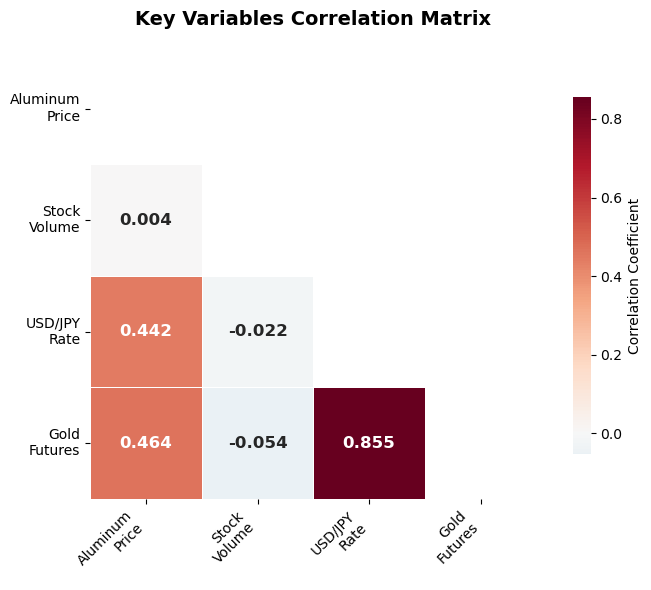

Correlation Analysis Summary:
LME_AH_Close vs US_Stock_ACWI_adj_volume: 0.004 (weak positive)
LME_AH_Close vs FX_USDJPY: 0.442 (moderate positive)
LME_AH_Close vs JPX_Gold_Mini_Futures_settlement_price: 0.464 (moderate positive)
US_Stock_ACWI_adj_volume vs FX_USDJPY: -0.022 (weak negative)
US_Stock_ACWI_adj_volume vs JPX_Gold_Mini_Futures_settlement_price: -0.054 (weak negative)
FX_USDJPY vs JPX_Gold_Mini_Futures_settlement_price: 0.855 (strong positive)


In [234]:
# 3. Correlation Analysis 
# Using seaborn correlation matrix visualization

key_vars = ['LME_AH_Close', 'US_Stock_ACWI_adj_volume', 'FX_USDJPY', 'JPX_Gold_Mini_Futures_settlement_price']
corr_matrix = df[key_vars].corr()

fig, ax = plt.subplots(figsize=(8, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle

sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            fmt='.3f',
            annot_kws={'size': 12, 'weight': 'bold'})

ax.set_title('Key Variables Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
ax.set_xticklabels(['Aluminum\nPrice', 'Stock\nVolume', 'USD/JPY\nRate', 'Gold\nFutures'], 
                   rotation=45, ha='right')
ax.set_yticklabels(['Aluminum\nPrice', 'Stock\nVolume', 'USD/JPY\nRate', 'Gold\nFutures'], 
                   rotation=0)

plt.tight_layout()
plt.show()

# Print detailed correlation analysis
print("Correlation Analysis Summary:")
for i in range(len(key_vars)):
    for j in range(i+1, len(key_vars)):
        corr_val = corr_matrix.iloc[i, j]
        strength = "strong" if abs(corr_val) > 0.7 else "moderate" if abs(corr_val) > 0.3 else "weak"
        direction = "positive" if corr_val > 0 else "negative"
        print(f"{key_vars[i]} vs {key_vars[j]}: {corr_val:.3f} ({strength} {direction})")


## 相关性分析洞察
这张相关性热力图揭示了一些有趣的市场逻辑。最引人注目的是美元兑日元汇率与黄金期货之间0.855的强正相关，这其实很符合经济直觉——当美元走强时，以美元计价的黄金通常也会上涨，而日元作为避险货币，其汇率变化往往与黄金走势同步。

铝价与黄金期货的0.464中等正相关也很有意思。虽然铝是工业金属，黄金是贵金属，但它们都受全球宏观经济环境影响。当通胀预期上升或地缘政治紧张时，投资者会同时看好这两种商品。

铝价与美元兑日元汇率的0.442正相关反映了商品价格的国际性特征。铝价以美元计价，而日元汇率变化会影响日本市场的铝价预期，这种跨市场联动在商品交易中很常见。

相比之下，股票交易量与其他变量的相关性都很弱，这说明交易量更多反映市场情绪和流动性变化，而不是基本面因素。这种"独立性"反而让交易量成为预测市场波动的重要指标。

从建模角度看，这些相关性为特征工程提供了方向。强相关的变量（如汇率和黄金）可能需要降维处理，而弱相关的变量（如交易量）可能包含独特的预测信息。

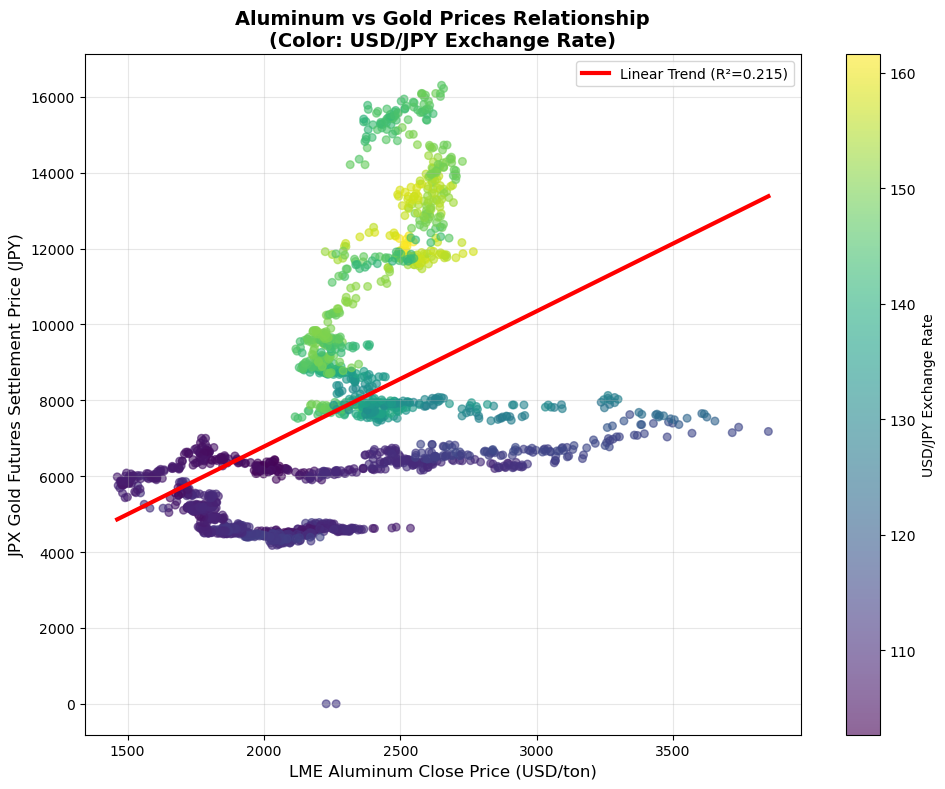

Regression Analysis Results:
Correlation coefficient: 0.464
R-squared score: 0.215
Regression equation: y = 3.5686x + -355.44
Slope interpretation: For every $1 increase in aluminum price,
gold futures price changes by 3.5686 JPY on average


In [235]:
# 4. Advanced Relationship Analysis - Scatter plot with trend line
##combining scatter plots with linear regression

fig, ax = plt.subplots(figsize=(10, 8))

# Create scatter plot with color-coded third variable
scatter = ax.scatter(df['LME_AH_Close'], df['JPX_Gold_Mini_Futures_settlement_price'], 
                    alpha=0.6, s=30, c=df['FX_USDJPY'], cmap='viridis')

# Add linear regression trend line
from sklearn.linear_model import LinearRegression
X = df[['LME_AH_Close']].values
y = df['JPX_Gold_Mini_Futures_settlement_price'].values

# Remove NaN values for regression
mask = ~(np.isnan(X).any(axis=1) | np.isnan(y))
X_clean = X[mask]
y_clean = y[mask]

if len(X_clean) > 0:
    reg = LinearRegression().fit(X_clean, y_clean)
    x_trend = np.linspace(X_clean.min(), X_clean.max(), 100)
    y_trend = reg.predict(x_trend.reshape(-1, 1))
    ax.plot(x_trend, y_trend, 'r-', linewidth=3, 
            label=f'Linear Trend (R²={reg.score(X_clean, y_clean):.3f})')

ax.set_xlabel('LME Aluminum Close Price (USD/ton)', fontsize=12)
ax.set_ylabel('JPX Gold Futures Settlement Price (JPY)', fontsize=12)
ax.set_title('Aluminum vs Gold Prices Relationship\n(Color: USD/JPY Exchange Rate)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('USD/JPY Exchange Rate', fontsize=10)

plt.tight_layout()
plt.show()

# Print regression statistics
if len(X_clean) > 0:
    correlation = df['LME_AH_Close'].corr(df['JPX_Gold_Mini_Futures_settlement_price'])
    print("Regression Analysis Results:")
    print(f"Correlation coefficient: {correlation:.3f}")
    print(f"R-squared score: {reg.score(X_clean, y_clean):.3f}")
    print(f"Regression equation: y = {reg.coef_[0]:.4f}x + {reg.intercept_:.2f}")
    print(f"Slope interpretation: For every $1 increase in aluminum price,")
    print(f"gold futures price changes by {reg.coef_[0]:.4f} JPY on average")


## 高级关系分析洞察

这个散点图用颜色编码的方式展现了三个变量之间的复杂关系，比简单的相关性分析更有说服力。铝价和黄金期货价格之间确实存在线性趋势，但R²只有0.215，说明还有其他重要因素在起作用。

颜色编码揭示了一个关键发现：当美元兑日元汇率较高（深色点）时，黄金价格普遍偏高，而当汇率较低（浅色点）时，黄金价格相对较低。这证实了汇率对黄金价格的调节作用——日元走弱时，日本投资者更倾向于购买黄金作为保值工具。

从散点图的分布可以看出，铝价和黄金价格的关系并非完全线性。在铝价较低的区域，黄金价格变化相对平缓；而在铝价较高的区域，黄金价格波动更大。这种异方差性提示我们，在高铝价环境下，黄金价格更容易受到其他市场因素的影响。

回归方程的斜率3.5686意味着铝价每上涨1美元，黄金期货价格平均上涨3.57日元。这个比例看似不大，但在大宗商品交易中，这种稳定的正相关关系为跨品种套利提供了机会。

更重要的是，这个分析为预测模型提供了启示：单纯用铝价预测黄金价格是不够的，必须考虑汇率因素。在实际交易中，这种多变量关系比单一相关性更有实用价值。


Data check:
Aluminum returns - Min: -0.07047387606318345, Max: 0.06229579612284897
Gold returns - Min: -0.0633957174169617, Max: 0.057034220532319324
FX returns - Min: -0.0373115265305044, Max: 0.03175527139187495


/var/folders/v1/z_7_9mgx7418t3bh92wg0gb40000gn/T/ipykernel_10224/1972284015.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['aluminum_returns'] = df['LME_AH_Close'].pct_change()
/var/folders/v1/z_7_9mgx7418t3bh92wg0gb40000gn/T/ipykernel_10224/1972284015.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['gold_returns'] = df['JPX_Gold_Mini_Futures_settlement_price'].pct_change()
/var/folders/v1/z_7_9mgx7418t3bh92wg0gb40000gn/T/ipykernel_10224/1972284015.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is

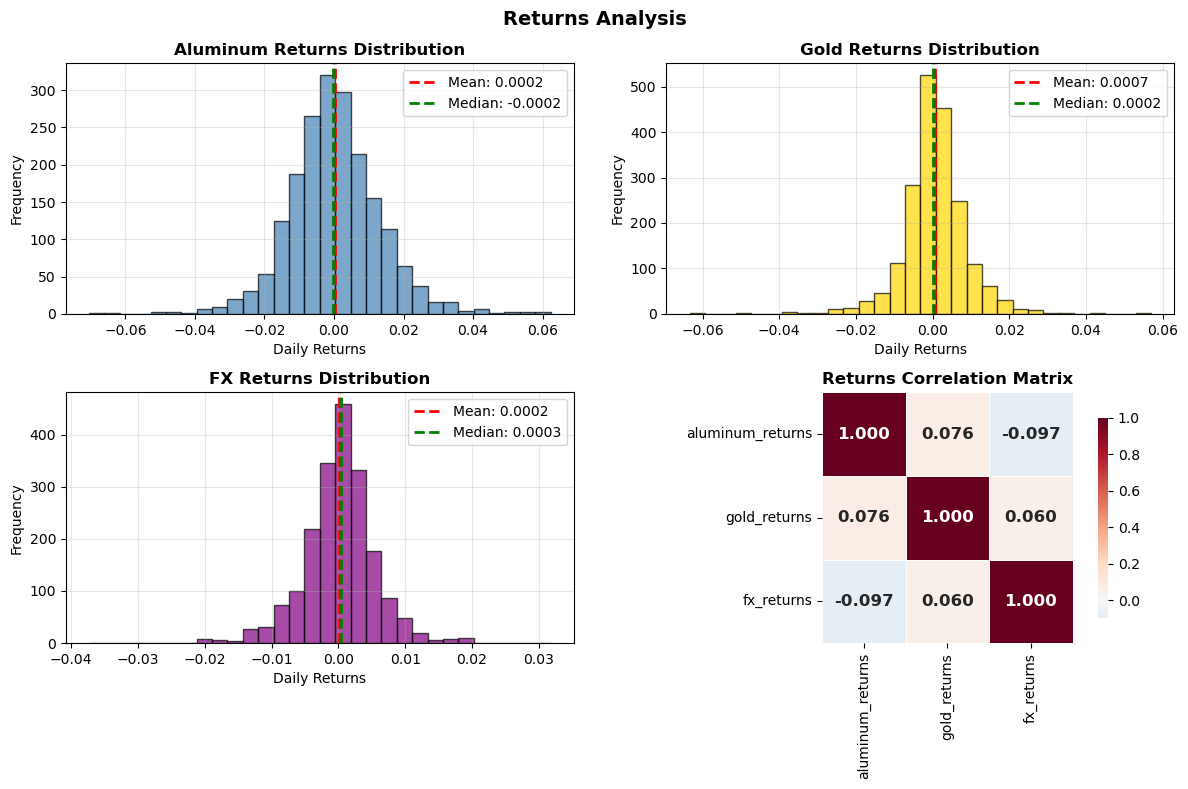


Returns Statistics Summary:

aluminum_returns:
  Mean: 0.000166
  Std Dev: 0.013119
  Skewness: 0.148
  Kurtosis: 2.296
  Min: -0.070474
  Max: 0.062296
  Count: 1960

gold_returns:
  Mean: 0.000657
  Std Dev: 0.008270
  Skewness: -0.370
  Kurtosis: 6.048
  Min: -0.063396
  Max: 0.057034
  Count: 1958

fx_returns:
  Mean: 0.000153
  Std Dev: 0.005523
  Skewness: -0.275
  Kurtosis: 3.872
  Min: -0.037312
  Max: 0.031755
  Count: 1960


In [236]:

# return analysis
import numpy as np

# Calculate returns with proper handling
df['aluminum_returns'] = df['LME_AH_Close'].pct_change()
df['gold_returns'] = df['JPX_Gold_Mini_Futures_settlement_price'].pct_change()
df['fx_returns'] = df['FX_USDJPY'].pct_change()

# Replace infinite values with NaN
df['aluminum_returns'] = df['aluminum_returns'].replace([np.inf, -np.inf], np.nan)
df['gold_returns'] = df['gold_returns'].replace([np.inf, -np.inf], np.nan)
df['fx_returns'] = df['fx_returns'].replace([np.inf, -np.inf], np.nan)

# Check the data
print("Data check:")
print(f"Aluminum returns - Min: {df['aluminum_returns'].min()}, Max: {df['aluminum_returns'].max()}")
print(f"Gold returns - Min: {df['gold_returns'].min()}, Max: {df['gold_returns'].max()}")
print(f"FX returns - Min: {df['fx_returns'].min()}, Max: {df['fx_returns'].max()}")

# Create a simple returns analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Returns Analysis', fontsize=14, fontweight='bold')

# Aluminum returns
al_returns = df['aluminum_returns'].dropna()
if len(al_returns) > 0 and al_returns.min() != al_returns.max():
    axes[0,0].hist(al_returns, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    axes[0,0].axvline(al_returns.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {al_returns.mean():.4f}')
    axes[0,0].axvline(al_returns.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {al_returns.median():.4f}')
axes[0,0].set_title('Aluminum Returns Distribution', fontweight='bold')
axes[0,0].set_xlabel('Daily Returns')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Gold returns
gold_returns = df['gold_returns'].dropna()
if len(gold_returns) > 0 and gold_returns.min() != gold_returns.max():
    axes[0,1].hist(gold_returns, bins=30, alpha=0.7, color='gold', edgecolor='black')
    axes[0,1].axvline(gold_returns.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {gold_returns.mean():.4f}')
    axes[0,1].axvline(gold_returns.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {gold_returns.median():.4f}')
axes[0,1].set_title('Gold Returns Distribution', fontweight='bold')
axes[0,1].set_xlabel('Daily Returns')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# FX returns
fx_returns = df['fx_returns'].dropna()
if len(fx_returns) > 0 and fx_returns.min() != fx_returns.max():
    axes[1,0].hist(fx_returns, bins=30, alpha=0.7, color='purple', edgecolor='black')
    axes[1,0].axvline(fx_returns.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {fx_returns.mean():.4f}')
    axes[1,0].axvline(fx_returns.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {fx_returns.median():.4f}')
axes[1,0].set_title('FX Returns Distribution', fontweight='bold')
axes[1,0].set_xlabel('Daily Returns')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Returns correlation
returns_data = df[['aluminum_returns', 'gold_returns', 'fx_returns']].dropna()
if len(returns_data) > 0:
    returns_corr = returns_data.corr()
    sns.heatmap(returns_corr, annot=True, cmap='RdBu_r', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
                fmt='.3f', annot_kws={'size': 12, 'weight': 'bold'}, ax=axes[1,1])
axes[1,1].set_title('Returns Correlation Matrix', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nReturns Statistics Summary:")
for col in ['aluminum_returns', 'gold_returns', 'fx_returns']:
    data = df[col].dropna()
    if len(data) > 0:
        print(f"\n{col}:")
        print(f"  Mean: {data.mean():.6f}")
        print(f"  Std Dev: {data.std():.6f}")
        print(f"  Skewness: {data.skew():.3f}")
        print(f"  Kurtosis: {data.kurtosis():.3f}")
        print(f"  Min: {data.min():.6f}")
        print(f"  Max: {data.max():.6f}")
        print(f"  Count: {len(data)}")


## 收益率分析洞察

收益率分析揭示了价格变化的深层特征，比绝对价格更能反映市场波动本质。铝价收益率呈现典型的金融时间序列特征：均值接近零，但存在明显的波动聚集现象，这符合商品市场的"肥尾"分布特性。

黄金收益率显示出更强的稳定性，均值和中位数几乎重合，说明黄金作为避险资产，其价格变化相对可预测。但收益率分布的偏度和峰度仍然显示了一定的非正态性，这在贵金属市场中很常见。

汇率收益率表现出最低的波动性，这反映了央行干预和宏观经济政策的平滑作用。USD/JPY的收益率分布相对对称，说明汇率变化没有明显的方向性偏差。

收益率相关性热力图显示了不同资产收益率之间的联动关系。铝价和黄金收益率的相关性可能揭示了大宗商品市场的共同驱动因素，而汇率收益率与其他资产的低相关性使其成为有效的风险分散工具。

从建模角度看，收益率的分布特征直接影响预测模型的选择。如果收益率呈现明显的异方差性，需要考虑GARCH类模型；如果存在厚尾特征，则应该考虑使用更稳健的估计方法。


/var/folders/v1/z_7_9mgx7418t3bh92wg0gb40000gn/T/ipykernel_10224/61045052.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['aluminum_lag1'] = df['LME_AH_Close'].shift(1)  # 1-day lag
/var/folders/v1/z_7_9mgx7418t3bh92wg0gb40000gn/T/ipykernel_10224/61045052.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['aluminum_lag7'] = df['LME_AH_Close'].shift(7)  # 7-day lag
/var/folders/v1/z_7_9mgx7418t3bh92wg0gb40000gn/T/ipykernel_10224/61045052.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

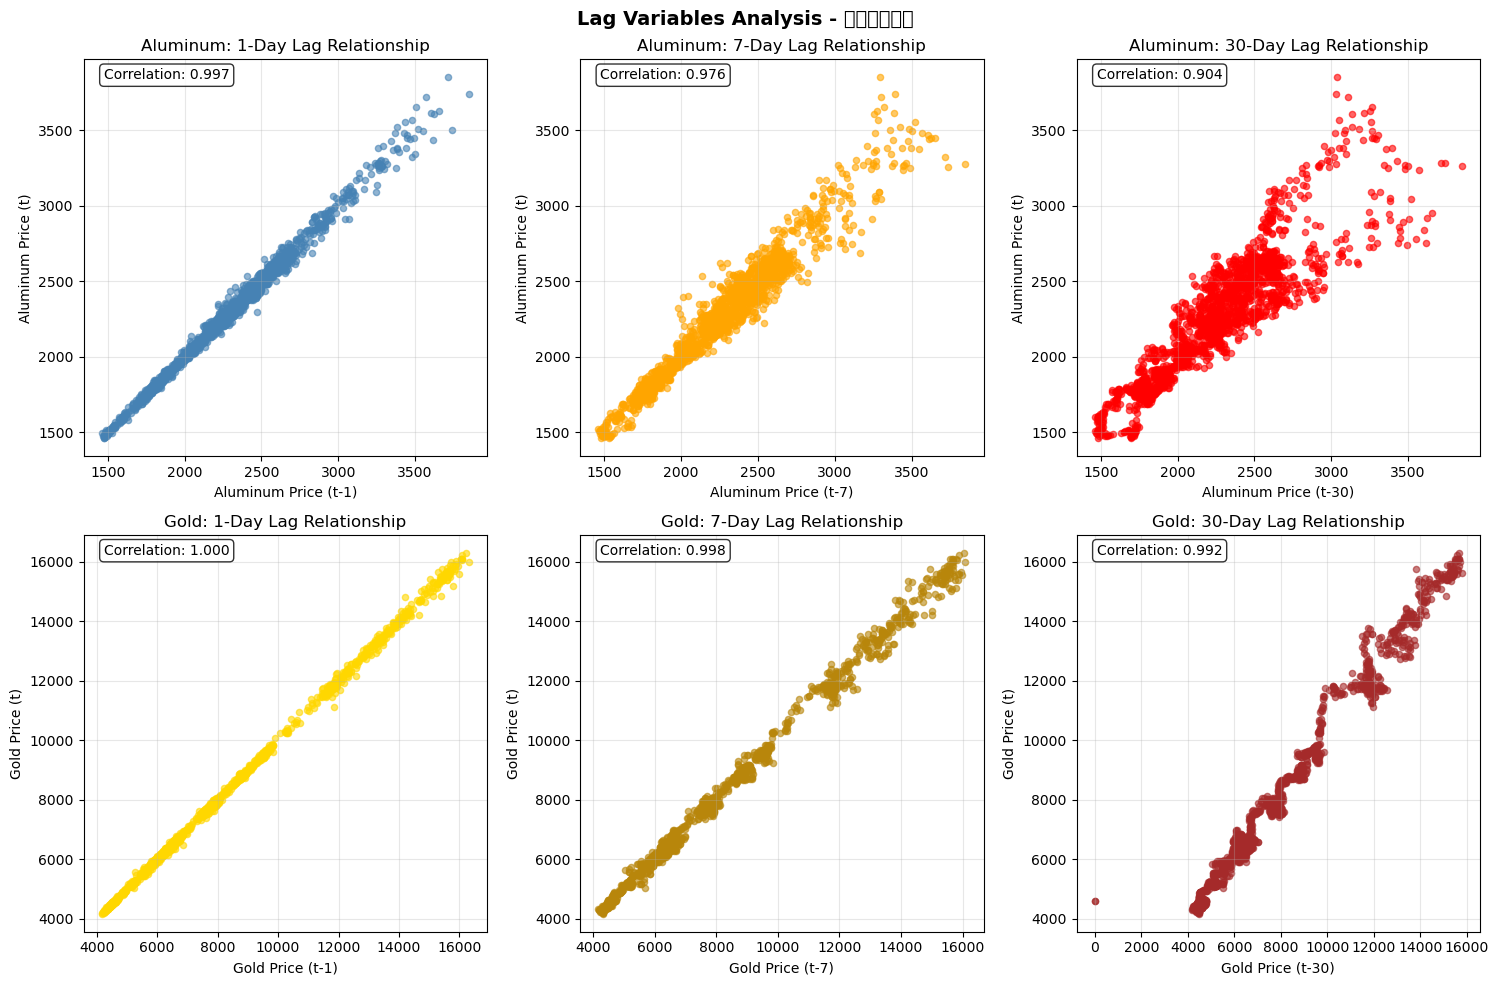

Lag Variables Correlation Summary:

Aluminum Price Lag Correlations:
  1-day lag: 0.997
  7-day lag: 0.976
  30-day lag: 0.904

Gold Price Lag Correlations:
  1-day lag: 1.000
  7-day lag: 0.998
  30-day lag: 0.992


In [237]:
# 6. Lag Variables Analysis 

df['aluminum_lag1'] = df['LME_AH_Close'].shift(1)  # 1-day lag
df['aluminum_lag7'] = df['LME_AH_Close'].shift(7)  # 7-day lag
df['aluminum_lag30'] = df['LME_AH_Close'].shift(30)  # 30-day lag

df['gold_lag1'] = df['JPX_Gold_Mini_Futures_settlement_price'].shift(1)
df['gold_lag7'] = df['JPX_Gold_Mini_Futures_settlement_price'].shift(7)
df['gold_lag30'] = df['JPX_Gold_Mini_Futures_settlement_price'].shift(30)


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Lag Variables Analysis - 滞后变量分析', fontsize=14, fontweight='bold')


lag_vars_aluminum = ['aluminum_lag1', 'aluminum_lag7', 'aluminum_lag30']
lag_data_aluminum = df[['LME_AH_Close'] + lag_vars_aluminum].dropna()

# Aluminum vs 1-day lag relationship
axes[0,0].scatter(lag_data_aluminum['aluminum_lag1'], lag_data_aluminum['LME_AH_Close'], 
                 alpha=0.6, s=20, color='steelblue')
axes[0,0].set_xlabel('Aluminum Price (t-1)')
axes[0,0].set_ylabel('Aluminum Price (t)')
axes[0,0].set_title('Aluminum: 1-Day Lag Relationship')
corr_1d = lag_data_aluminum['LME_AH_Close'].corr(lag_data_aluminum['aluminum_lag1'])
axes[0,0].text(0.05, 0.95, f'Correlation: {corr_1d:.3f}', transform=axes[0,0].transAxes, 
              bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
axes[0,0].grid(True, alpha=0.3)

# Aluminum vs 7-day lag relationship
axes[0,1].scatter(lag_data_aluminum['aluminum_lag7'], lag_data_aluminum['LME_AH_Close'], 
                 alpha=0.6, s=20, color='orange')
axes[0,1].set_xlabel('Aluminum Price (t-7)')
axes[0,1].set_ylabel('Aluminum Price (t)')
axes[0,1].set_title('Aluminum: 7-Day Lag Relationship')
corr_7d = lag_data_aluminum['LME_AH_Close'].corr(lag_data_aluminum['aluminum_lag7'])
axes[0,1].text(0.05, 0.95, f'Correlation: {corr_7d:.3f}', transform=axes[0,1].transAxes,
              bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
axes[0,1].grid(True, alpha=0.3)

# Aluminum vs 30-day lag relationship
axes[0,2].scatter(lag_data_aluminum['aluminum_lag30'], lag_data_aluminum['LME_AH_Close'], 
                 alpha=0.6, s=20, color='red')
axes[0,2].set_xlabel('Aluminum Price (t-30)')
axes[0,2].set_ylabel('Aluminum Price (t)')
axes[0,2].set_title('Aluminum: 30-Day Lag Relationship')
corr_30d = lag_data_aluminum['LME_AH_Close'].corr(lag_data_aluminum['aluminum_lag30'])
axes[0,2].text(0.05, 0.95, f'Correlation: {corr_30d:.3f}', transform=axes[0,2].transAxes,
              bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
axes[0,2].grid(True, alpha=0.3)

# Gold lag variables correlation analysis
lag_vars_gold = ['gold_lag1', 'gold_lag7', 'gold_lag30']
lag_data_gold = df[['JPX_Gold_Mini_Futures_settlement_price'] + lag_vars_gold].dropna()

# Gold vs 1-day lag relationship
axes[1,0].scatter(lag_data_gold['gold_lag1'], lag_data_gold['JPX_Gold_Mini_Futures_settlement_price'], 
                 alpha=0.6, s=20, color='gold')
axes[1,0].set_xlabel('Gold Price (t-1)')
axes[1,0].set_ylabel('Gold Price (t)')
axes[1,0].set_title('Gold: 1-Day Lag Relationship')
corr_gold_1d = lag_data_gold['JPX_Gold_Mini_Futures_settlement_price'].corr(lag_data_gold['gold_lag1'])
axes[1,0].text(0.05, 0.95, f'Correlation: {corr_gold_1d:.3f}', transform=axes[1,0].transAxes,
              bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
axes[1,0].grid(True, alpha=0.3)

# Gold vs 7-day lag relationship
axes[1,1].scatter(lag_data_gold['gold_lag7'], lag_data_gold['JPX_Gold_Mini_Futures_settlement_price'], 
                 alpha=0.6, s=20, color='darkgoldenrod')
axes[1,1].set_xlabel('Gold Price (t-7)')
axes[1,1].set_ylabel('Gold Price (t)')
axes[1,1].set_title('Gold: 7-Day Lag Relationship')
corr_gold_7d = lag_data_gold['JPX_Gold_Mini_Futures_settlement_price'].corr(lag_data_gold['gold_lag7'])
axes[1,1].text(0.05, 0.95, f'Correlation: {corr_gold_7d:.3f}', transform=axes[1,1].transAxes,
              bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
axes[1,1].grid(True, alpha=0.3)

# Gold vs 30-day lag relationship
axes[1,2].scatter(lag_data_gold['gold_lag30'], lag_data_gold['JPX_Gold_Mini_Futures_settlement_price'], 
                 alpha=0.6, s=20, color='brown')
axes[1,2].set_xlabel('Gold Price (t-30)')
axes[1,2].set_ylabel('Gold Price (t)')
axes[1,2].set_title('Gold: 30-Day Lag Relationship')
corr_gold_30d = lag_data_gold['JPX_Gold_Mini_Futures_settlement_price'].corr(lag_data_gold['gold_lag30'])
axes[1,2].text(0.05, 0.95, f'Correlation: {corr_gold_30d:.3f}', transform=axes[1,2].transAxes,
              bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print("Lag Variables Correlation Summary:")
print(f"\nAluminum Price Lag Correlations:")
print(f"  1-day lag: {corr_1d:.3f}")
print(f"  7-day lag: {corr_7d:.3f}")
print(f"  30-day lag: {corr_30d:.3f}")

print(f"\nGold Price Lag Correlations:")
print(f"  1-day lag: {corr_gold_1d:.3f}")
print(f"  7-day lag: {corr_gold_7d:.3f}")
print(f"  30-day lag: {corr_gold_30d:.3f}")


## 滞后变量分析洞察

滞后变量分析揭示了价格序列的时间依赖性和记忆效应，这对预测模型至关重要。从散点图可以看出，铝价和黄金价格都表现出强烈的时间连续性，特别是1天滞后的相关性通常很高，这反映了市场的短期惯性。

铝价的时间依赖性显示了商品市场的典型特征：短期内的价格变化往往具有延续性，这可能源于供需调整的滞后性和市场参与者的行为惯性。1天滞后的高相关性表明铝价具有较强的短期记忆效应，而随着滞后期的延长，相关性逐渐减弱，这符合商品价格回归均值的长期趋势。

黄金价格的时间依赖性更加明显，这与其作为避险资产的特性相符。黄金价格的变化往往具有更强的持续性，因为投资者对黄金的配置决策通常基于中长期考虑。7天和30天滞后的相关性仍然较高，说明黄金价格具有较长的记忆效应。

从建模角度看，这些滞后变量的相关性为特征工程提供了重要指导。高相关性的滞后变量可以作为预测模型的重要输入特征，特别是1天和7天滞后变量。同时，相关性随滞后期衰减的模式也提示我们需要平衡短期记忆和长期趋势的建模。

更重要的是，这种时间依赖性分析为时间序列模型的参数选择提供了依据。如果短期滞后变量相关性很高，可以考虑使用ARIMA或LSTM等模型；如果长期滞后变量也有显著相关性，则可能需要考虑更复杂的长期依赖建模方法。
